In [9]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import visualisations

%matplotlib inline

In [3]:
meshgrid = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathymetry = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
T_lon = bathymetry.variables['nav_lon'][:]
T_lat = bathymetry.variables['nav_lat'][:]
grid = meshgrid.variables['gdepw_0'][:]
depths = meshgrid.variables['gdept_1d'][:]

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


[258 178]
[344 276]
[388 271]


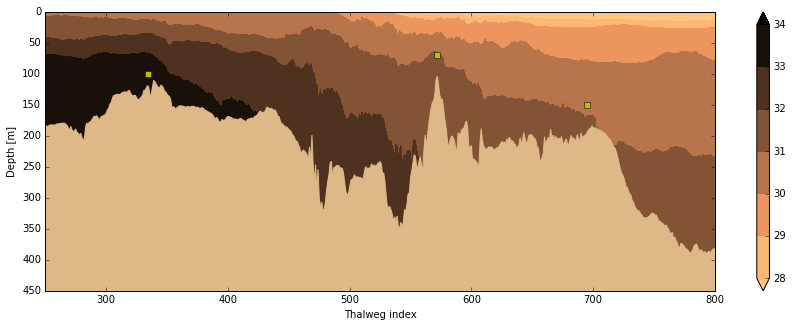

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
visualisations.contour_thalweg(ax, sal2017, bathymetry, meshgrid, clevels=[28, 29, 30, 31, 32, 33, 34], cmap='copper_r',
                              xcoord_distance=False)
ax.set_xlim((250, 800))
ax.plot(334, 100, 'ys')
ax.plot(572, 70, 'ys')
ax.plot(695, 150, 'ys')
print (lines[334])
print (lines[572])
print (lines[695])

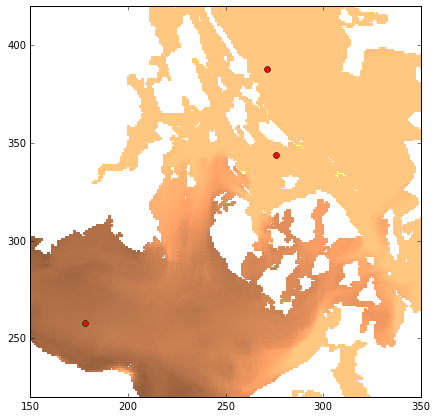

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.pcolormesh(sal2017[0], cmap='copper_r', vmin=28, vmax=34)
ax.set_xlim((150, 350))
ax.set_ylim((220, 420))
ax.plot(lines[334, 1], lines[334, 0], 'ro')
ax.plot(lines[572, 1], lines[572, 0], 'ro')
ax.plot(lines[695, 1], lines[695, 0], 'ro')

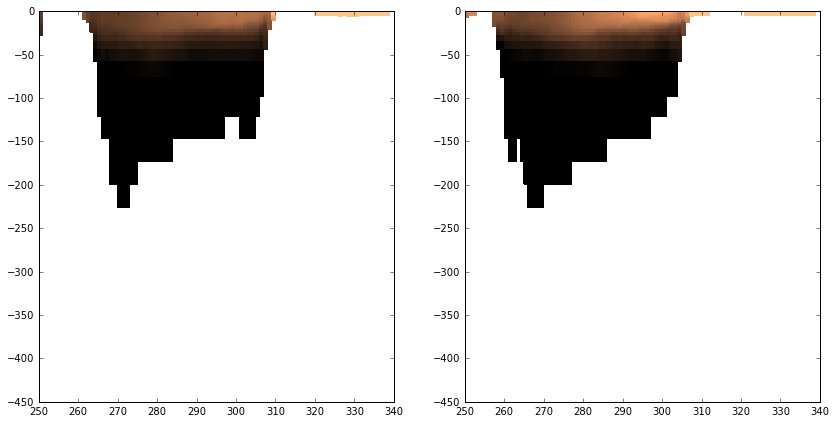

In [97]:
tt = np.arange(250, 340);

XX, ZZ = np.meshgrid(tt,-depths[:])
fig, ax = plt.subplots(1, 2, figsize=(14,7))
mesh = ax[0].pcolormesh(XX, ZZ, sal2017[:, 388, 250:340], cmap='copper_r', vmin=28, vmax=30)
mesh = ax[1].pcolormesh(XX, ZZ, sal2017[:, 395, 250:340], cmap='copper_r', vmin=28, vmax=30)

In [53]:
lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)

thalweg_lon = T_lon[lines[:,0],lines[:,1]]
thalweg_lat = T_lat[lines[:,0],lines[:,1]]

ds=np.arange(0,lines.shape[0],1);

XX,ZZ = np.meshgrid(ds,-depths[:])

(200, 800)

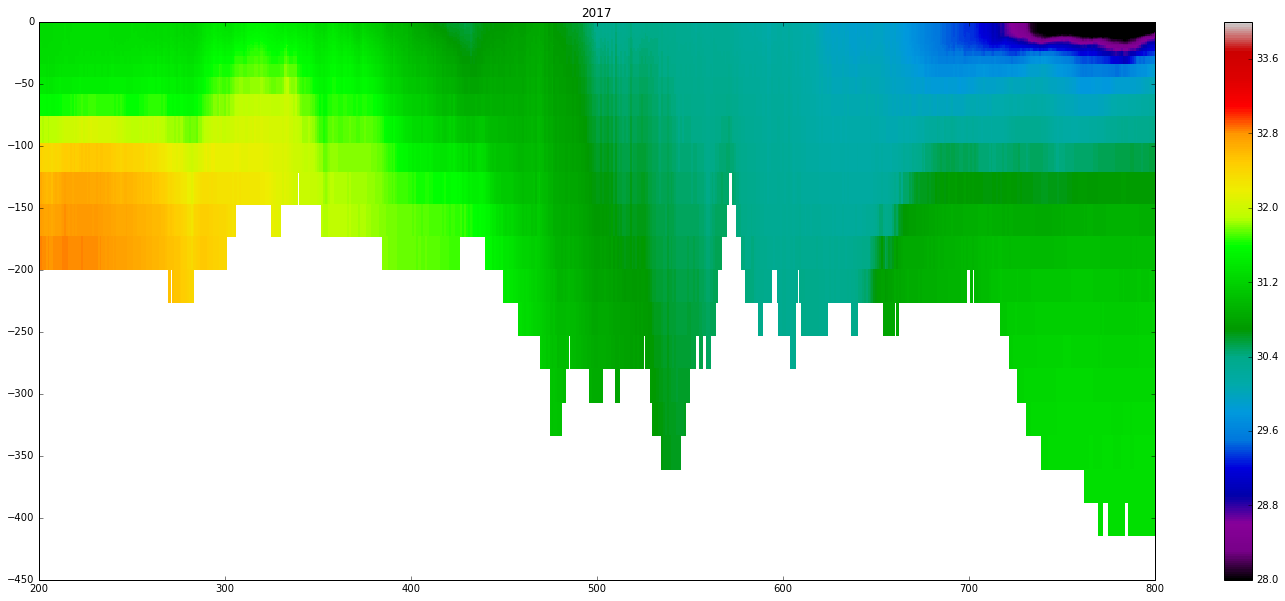

In [24]:
smax, smin = 34, 28
salT=sal2017[:,lines[:,0],lines[:,1]]

plt.figure(figsize=(25,10))
plt.pcolormesh(XX, ZZ, salT[:], vmin=smin, vmax=smax, cmap='spectral')
plt.colorbar()
plt.title('2017')
plt.xlim(200,800)

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


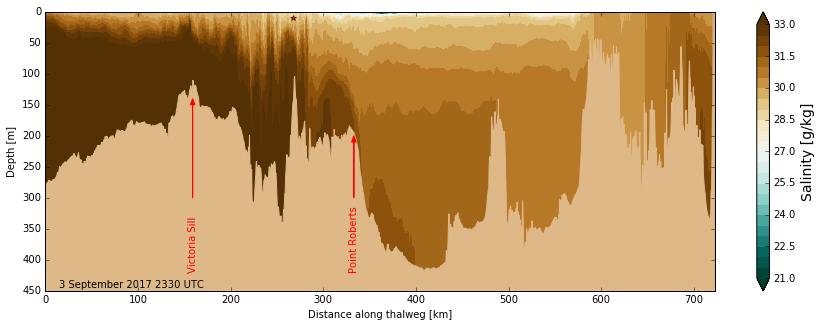

In [46]:
fT2017 = nc.Dataset('/results/SalishSea/nowcast-green/03sep17/SalishSea_1h_20170903_20170903_grid_T.nc','r')
sal2017 = fT2017.variables['vosaline'][23,:]
m = sal2017 == 0
sal2017 = np.ma.array(sal2017,mask=m)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
cbar = visualisations.contour_thalweg(ax, sal2017, bathymetry, meshgrid, 
                               clevels=[
                                   21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5, 
                                        27, 27.5, 
                                   28, 28.5, 29, 29.5, 30, 30.5, 31, 31.5, 32, 32.5, 33], cmap='BrBG_r',
                              xcoord_distance=True)
cbar.set_label(label='Salinity [g/kg]', size=14)

# Timestamp
ax.text(0.02, 0.01, '3 September 2017 2330 UTC', transform=ax.transAxes)

ax.arrow(159, 300, 0, -150, fc='r', ec='r', head_width=5, head_length=10)
ax.plot(267, 10, 'r*')
ax.arrow(333, 300, 0, -90, fc='r', ec='r', head_width=5, head_length=10)
ax.text(159, 420, 'Victoria Sill', rotation=90, horizontalalignment='center',
        verticalalignment='bottom', color='r')
ax.text(333, 420, 'Point Roberts', rotation=90, horizontalalignment='center',
        verticalalignment='bottom', color='r')

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


-125.927246094
50.3985328674
-126.167480469
50.4718170166


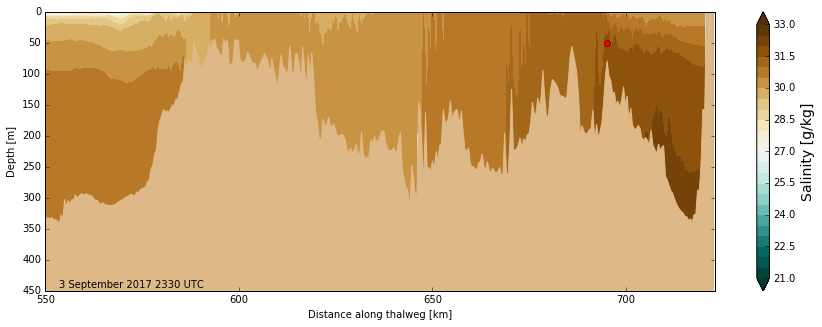

In [64]:
fT2017 = nc.Dataset('/results/SalishSea/nowcast-green/03sep17/SalishSea_1h_20170903_20170903_grid_T.nc','r')
sal2017 = fT2017.variables['vosaline'][23,:]
m = sal2017 == 0
sal2017 = np.ma.array(sal2017,mask=m)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
cbar = visualisations.contour_thalweg(ax, sal2017, bathymetry, meshgrid, 
                               clevels=[
                                   21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5, 
                                        27, 27.5, 
                                   28, 28.5, 29, 29.5, 30, 30.5, 31, 31.5, 32, 32.5, 33], cmap='BrBG_r',
                              xcoord_distance=True)
cbar.set_label(label='Salinity [g/kg]', size=14)

# Timestamp
ax.text(0.02, 0.01, '3 September 2017 2330 UTC', transform=ax.transAxes)


ax.set_xlim(550, 723)
ax.plot(695, 50, 'ro')

print(T_lon[lines[1480,0],lines[1480,1]])
print(T_lat[lines[1480,0],lines[1480,1]])

print(T_lon[lines[1539,0],lines[1539,1]])
print(T_lat[lines[1539,0],lines[1539,1]])

In [60]:
print(lines.shape)

(1540, 2)


-126.167480469
50.4718170166
